In [1]:
import numpy as np

# 生成随机的日期数据
np.random.seed(0)
days = np.arange(1, 31)
sales = 100 + 2 * days + np.random.normal(0, 10, len(days))

In [2]:
days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [3]:
sales

array([119.64052346, 108.00157208, 115.78737984, 130.40893199,
       128.6755799 , 102.2272212 , 123.50088418, 114.48642792,
       116.96781148, 124.10598502, 123.44043571, 138.54273507,
       133.61037725, 129.21675016, 134.43863233, 135.33674327,
       148.94079073, 133.94841736, 141.13067702, 131.45904261,
       116.47010184, 150.53618595, 154.64436199, 140.5783498 ,
       172.69754624, 137.45634325, 154.45758517, 154.1281615 ,
       173.32779214, 174.6935877 ])

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 定义高斯过程回归模型
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# 训练模型
X = days.reshape(-1, 1)
y = sales
gp.fit(X, y)

c:\Software\Anaconda\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [7]:
import matplotlib.pyplot as plt

# 生成一组测试数据
X_test = np.linspace(1, 30, 100).reshape(-1, 1)
X_test

array([[ 1.        ],
       [ 1.29292929],
       [ 1.58585859],
       [ 1.87878788],
       [ 2.17171717],
       [ 2.46464646],
       [ 2.75757576],
       [ 3.05050505],
       [ 3.34343434],
       [ 3.63636364],
       [ 3.92929293],
       [ 4.22222222],
       [ 4.51515152],
       [ 4.80808081],
       [ 5.1010101 ],
       [ 5.39393939],
       [ 5.68686869],
       [ 5.97979798],
       [ 6.27272727],
       [ 6.56565657],
       [ 6.85858586],
       [ 7.15151515],
       [ 7.44444444],
       [ 7.73737374],
       [ 8.03030303],
       [ 8.32323232],
       [ 8.61616162],
       [ 8.90909091],
       [ 9.2020202 ],
       [ 9.49494949],
       [ 9.78787879],
       [10.08080808],
       [10.37373737],
       [10.66666667],
       [10.95959596],
       [11.25252525],
       [11.54545455],
       [11.83838384],
       [12.13131313],
       [12.42424242],
       [12.71717172],
       [13.01010101],
       [13.3030303 ],
       [13.5959596 ],
       [13.88888889],
       [14

In [8]:
# 预测销售额
y_pred, sigma = gp.predict(X_test, return_std=True)
y_pred

array([119.64052346, 117.21812881, 112.64800263, 108.8549947 ,
       107.67190592, 109.27135361, 112.60143581, 116.45668353,
       120.35948711, 124.57433361, 129.27107601, 133.58890043,
       135.53253134, 133.04524065, 125.64093718, 115.38111361,
       106.27769289, 102.25724537, 104.89440175, 112.40249443,
       120.60365603, 125.30604156, 124.60392267, 119.71391558,
       113.95897065, 110.68255725, 111.43355539, 115.4199062 ,
       120.33189845, 123.83500088, 124.79672295, 123.65904187,
       121.9540484 , 121.39074996, 123.0285569 , 126.86729115,
       131.91932383, 136.64226287, 139.53961769, 139.73517798,
       137.34139263, 133.47028917, 129.81991098, 127.93835082,
       128.47180798, 130.80912007, 133.40783936, 134.71899758,
       134.20886   , 132.80769661, 132.39329149, 134.53448829,
       139.27989284, 144.84890525, 148.54268408, 148.36819903,
       144.33621403, 138.55913551, 134.04985461, 132.97339257,
       135.43838135, 139.52355082, 142.42455119, 141.95

In [9]:
sigma

array([1.00022206e-05, 2.31708056e+00, 2.28643000e+00, 7.57081604e-01,
       9.32610098e-01, 1.65249498e+00, 1.07231419e+00, 2.32979053e-01,
       1.24781455e+00, 1.24739390e+00, 2.94693600e-01, 8.43216206e-01,
       1.29044023e+00, 7.23838873e-01, 3.94559315e-01, 1.18608587e+00,
       1.03887717e+00, 7.87763691e-02, 9.35286614e-01, 1.20786927e+00,
       5.29184776e-01, 5.63189722e-01, 1.20869763e+00, 9.00601425e-01,
       1.16436239e-01, 1.04013291e+00, 1.14285380e+00, 3.44529673e-01,
       7.24820706e-01, 1.22200593e+00, 7.55330804e-01, 3.06827982e-01,
       1.12669522e+00, 1.05777838e+00, 1.54609682e-01, 8.70370833e-01,
       1.20874894e+00, 5.93709571e-01, 4.89573121e-01, 1.18664225e+00,
       9.47704678e-01, 3.87404401e-02, 9.94601658e-01, 1.16593006e+00,
       4.17601625e-01, 6.60111015e-01, 1.21713376e+00, 8.14105318e-01,
       2.31069783e-01, 1.09397910e+00, 1.09397910e+00, 2.31069783e-01,
       8.14105318e-01, 1.21713376e+00, 6.60111015e-01, 4.17601625e-01,
      

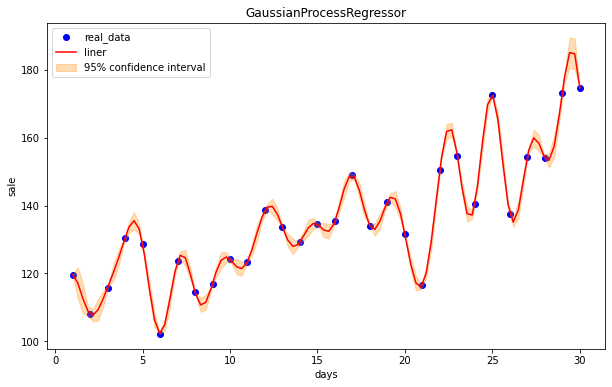

In [14]:
# 绘制拟合曲线和不确定性
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='b', label='real_data')
plt.plot(X_test, y_pred, 'r', label='liner')
plt.fill_between(X_test.flatten(), (y_pred - 1.96 * sigma), (y_pred + 1.96 * sigma), alpha=0.3, color='darkorange', label='95% confidence interval')
plt.xlabel('days')
plt.ylabel('sale')
plt.title('GaussianProcessRegressor')
plt.legend()
plt.show()